In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
fileName='/home/xenon/extensomllearn/Machine Learning A-Z/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Ads_CTR_Optimisation.csv'

In [3]:
dataset=pd.read_csv(fileName)

In [4]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward


In [5]:
total_reward

2618

In [6]:
numbers_of_rewards_0

[96, 62, 37, 30, 6711, 32, 59, 273, 43, 39]

In [7]:
numbers_of_rewards_1

[21, 7, 2, 1, 2503, 1, 7, 70, 3, 3]

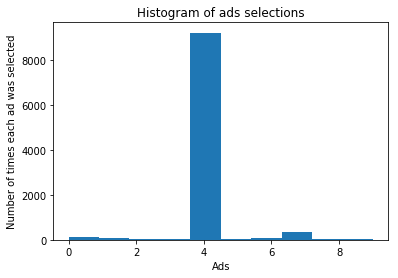

In [8]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()